In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import math
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
#import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Embedding
import json
import numpy as np
import sentencepiece as spm
from tensorflow.keras.utils import to_categorical
import glob
import pandas as pd
import time
from PIL import Image
import matplotlib.pyplot as plt
from MyTrans2 import MultiheadAttention,NomaskMultiheadAttention,AddPositionalEncoding,LayerNormalization,FeedForwardNetwork,ResidualNormalizationWrapper,_create_dec_self_attention_mask,create_model

2022-01-11 15:49:44.904295: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


In [2]:
PAD_ID=8515

In [3]:
model=create_model(hidden_vec_L=256,enbd=100,training=False)
model.load_weights("./Traindmodel/model_weights.h5")
model.summary()

2022-01-11 15:49:46.163714: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2022-01-11 15:49:46.223571: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:1c:00.0 name: Quadro RTX 4000 computeCapability: 7.5
coreClock: 1.545GHz coreCount: 36 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 387.49GiB/s
2022-01-11 15:49:46.224103: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 1 with properties: 
pciBusID: 0000:53:00.0 name: Quadro RTX 4000 computeCapability: 7.5
coreClock: 1.545GHz coreCount: 36 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 387.49GiB/s
2022-01-11 15:49:46.224128: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-01-11 15:49:46.225990: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2022-01

Instructions for updating:
Use `tf.cast` instead.
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 89)]         0                                            
__________________________________________________________________________________________________
tf_op_layer_Shape (TensorFlowOp [(2,)]               0           input_1[0][0]                    
__________________________________________________________________________________________________
tf_op_layer_unstack (TensorFlow [(), ()]             0           tf_op_layer_Shape[0][0]          
__________________________________________________________________________________________________
tf_op_layer_packed (TensorFlowO [(2,)]               0           tf_op_layer_unstack[0][1]        
                                     

In [4]:
class generate_data():
    def __init__(self,pas,wl):
        self.image_data_pass=pas
        self.sp = spm.SentencePieceProcessor()
        self.sp.Load("./CSVDATA/sentencepiece.model")
        self.wordL=wl
    def get_image_id(self,id_num):
        return np.load(self.image_data_pass+str(id_num)+'.npy')+self.wordL
    def create_text_id(self,q):
        textq=q.lower()
        decodeq=self.sp.EncodeAsIds(textq)
        return np.array(_S+decodeq+_E)
    def create_iandt(self,q,id_num):
        A=self.get_image_id(id_num)
        B=self.create_text_id(q)
        return np.concatenate((A,B), axis = 0).tolist()
    def id_text(self,encodetxt):
        #answer=self.sp.IdToPiece(encodetxt)
        return self.sp.DecodeIds(encodetxt)
    
def Return_imagepass(img_name):
    #n=12-len(str(img_name))
    img_pas_name=IMAGEFOLDER+str(img_name)+".jpg"
    return img_pas_name

def Return_input(input_list):
    inp_array=[]
    pad_num=89-len(input_list)
    lst = [PAD_ID] * pad_num
    c_data=np.array(input_list+lst)
    return np.array([c_data])

def get_result(inputdata):
    ans="error"
    L=len(inputdata)
    for i in range(3):
        x=Return_input(inputdata)
        tra_out = model.predict(x)
        softmax_data = tf.nn.softmax(tra_out)
        r_out=softmax_data.numpy()
        r_out1=np.argmax(r_out, axis = 2)[0]
        #r_out2 = r_out1[r_out1 != 8515]
        r_out2=r_out1.tolist()
        inputdata=r_out2[0:len(inputdata)+1]
        if(inputdata[-1]==8514):
            break
    inputdata = np.array(inputdata)[np.array(inputdata) != 8514]
    #print(inputdata[L:])
    inputdata = inputdata[inputdata != 8515]
    x=inputdata[L:].tolist()
    try:
        ans=dcreater.id_text(x)
    except:
        ans="error"
    return ans
def get_result2(inputdata,M):
    ans="error"
    L=len(inputdata)
    for i in range(3):
        x=Return_input(inputdata)
        tra_out = M.predict(x)
        softmax_data = tf.nn.softmax(tra_out)
        r_out=softmax_data.numpy()
        r_out1=np.argmax(r_out, axis = 2)[0]
        #r_out2 = r_out1[r_out1 != 8515]
        r_out2=r_out1.tolist()
        inputdata=r_out2[0:len(inputdata)+1]
        if(inputdata[-1]==8514):
            break
    inputdata = np.array(inputdata)[np.array(inputdata) != 8514]
    #print(inputdata[L:])
    inputdata = inputdata[inputdata != 8515]
    x=inputdata[L:].tolist()
    try:
        ans=dcreater.id_text(x)
    except:
        ans="error"
    return ans

In [5]:
_S=[8512]
_E=[8513]
_EA=[8514]
IMAGEFOLDER="./Data/test_image/"
#IMAGEFOLDER="./Image_data/train2014/COCO_train2014_"
#_PAD=[8515]
sp = spm.SentencePieceProcessor()


In [11]:

dcreater=generate_data('./Data/npy_data/',8000)

In [12]:
df = pd.read_csv("./CSVDATA/data.csv")
df

,Unnamed: 0,inputq,inputans,imgname
0,0,What is the position of the player behind the ...,catcher,testimg


In [13]:

qdata=df['inputq'].values                         #大成功 5
adata=df['inputans'].values                       #失敗
imgdata=df['imgname'].values



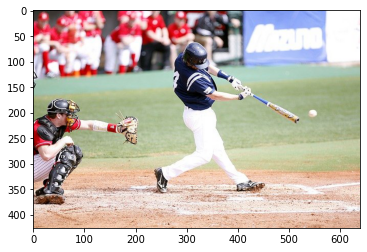

How many players ?
--------------------


In [14]:
n=0
imgpass=Return_imagepass(imgdata[n])
img = Image.open(imgpass)
plt.imshow(np.array(img))
plt.show()

qtxt='How many players ?'
print(qtxt)
print("-"*20)

In [45]:
inputdata1=dcreater.create_iandt(qtxt,imgdata[n])
ans=get_result(inputdata1)
print("Model answer:"+str(ans))


Model answer:2
